In [ ]:
import pandas as pd


dataset= "/content/Bank-Customer-Attrition-Insights-Data (1).csv"
df = pd.read_csv(dataset)


key_columns=['Balance', 'CreditScore']


summary_stats = df[key_columns].describe().T
summary_stats['Skewness']=df[key_columns].skew()
summary_stats['Kurtosis']=df[key_columns].kurtosis()


print(summary_stats)


               count          mean           std    min    25%       50%  \
Balance      10000.0  76485.889288  62397.405202    0.0    0.0  97198.54   
CreditScore  10000.0    650.528800     96.653299  350.0  584.0    652.00   

                   75%        max  Skewness  Kurtosis  
Balance      127644.24  250898.09 -0.141109 -1.489412  
CreditScore     718.00     850.00 -0.071607 -0.425726  


<ipython-input-3-ac923dc76577>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


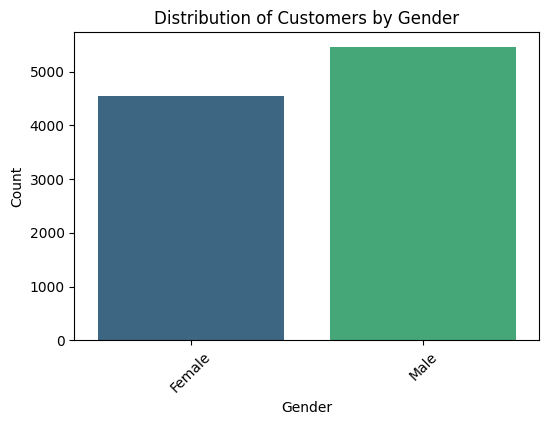

<ipython-input-3-ac923dc76577>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


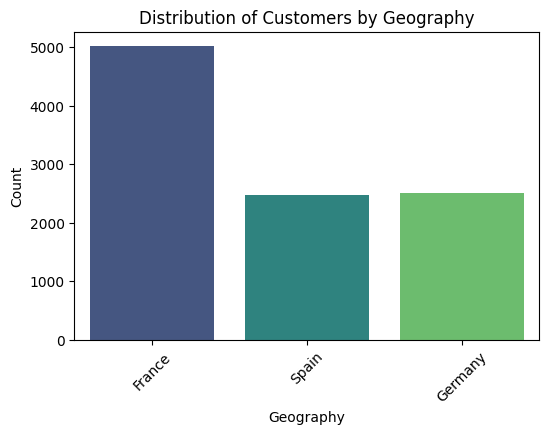

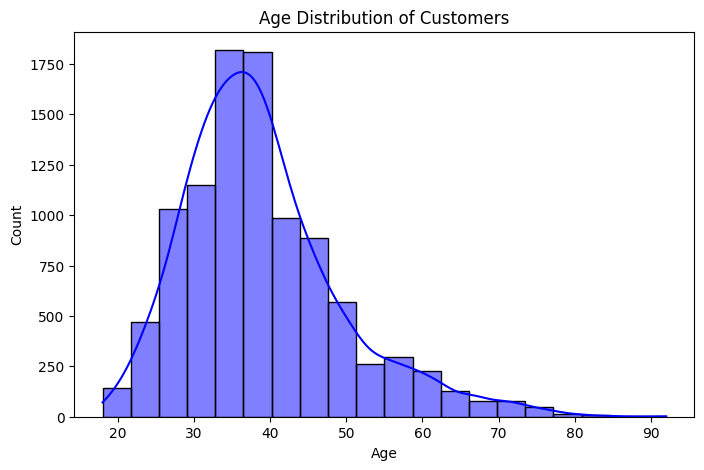

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_columns = ['Gender', 'Geography']
for col in categorical_columns:
      plt.figure(figsize=(6, 4))
      sns.countplot(x=df[col], palette='viridis')
      plt.title(f'Distribution of Customers by {col}')
      plt.xlabel(col)
      plt.ylabel('Count')
      plt.xticks(rotation=45)
      plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
transaction_col = 'NumOfProducts'
grouped_stats = df.groupby('IsActiveMember')[transaction_col].agg(['min', 'max', 'mean'])
grouped_stats.columns = ['Min_TransactionCount', 'Max_TransactionCount', 'Avg_TransactionCount']
print(grouped_stats)

                Min_TransactionCount  Max_TransactionCount  \
IsActiveMember                                               
0                                  1                     4   
1                                  1                     4   

                Avg_TransactionCount  
IsActiveMember                        
0                           1.524438  
1                           1.535624  


In [ ]:
selected_cols = ['CreditScore', 'Balance', 'NumOfProducts']
correlation_matrix = df[selected_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


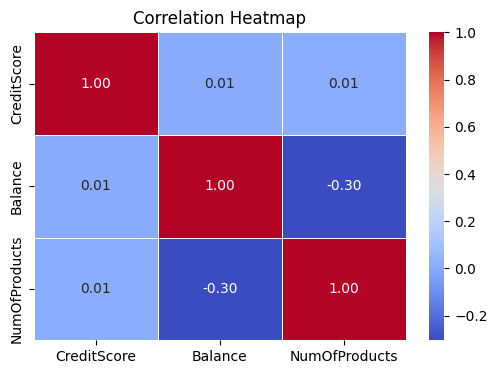

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

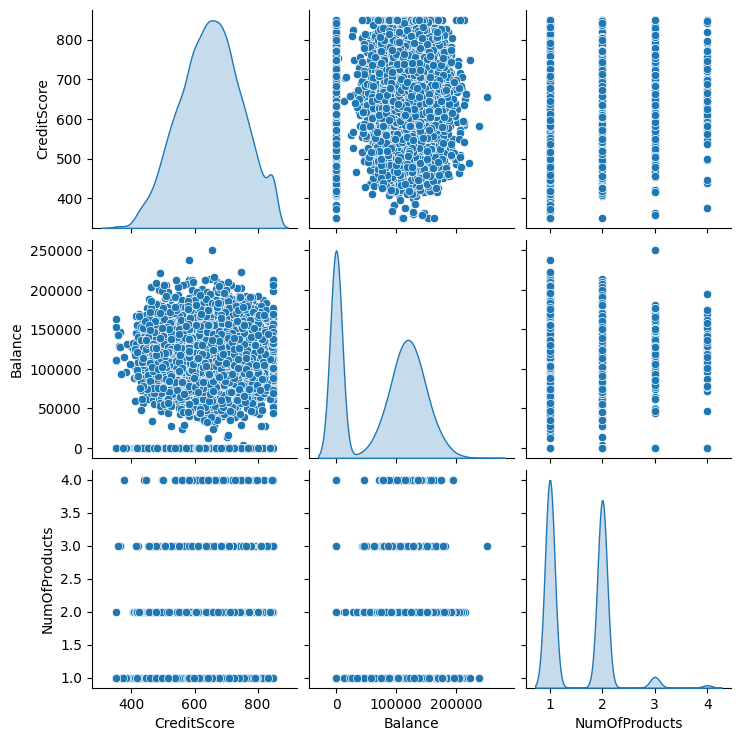

In [ ]:
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.show()

Balance & Transaction Differences Between Stayed vs Churned Customers:
         Balance_Mean  Balance_Median  Balance_Min  Balance_Max  \
Exited                                                           
0       72742.750663        92063.06          0.0    221532.80   
1       91109.476006       109344.23          0.0    250898.09   

        Transaction_Mean  Transaction_Median  Transaction_Min  Transaction_Max  
Exited                                                                          
0               1.544210                 2.0                1                3  
1               1.475466                 1.0                1                4  


<ipython-input-12-04b5e5b7051f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Exited'], y=df['Balance'], palette='coolwarm')
<ipython-input-12-04b5e5b7051f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Exited'], y=df[transaction_col], palette='coolwarm')


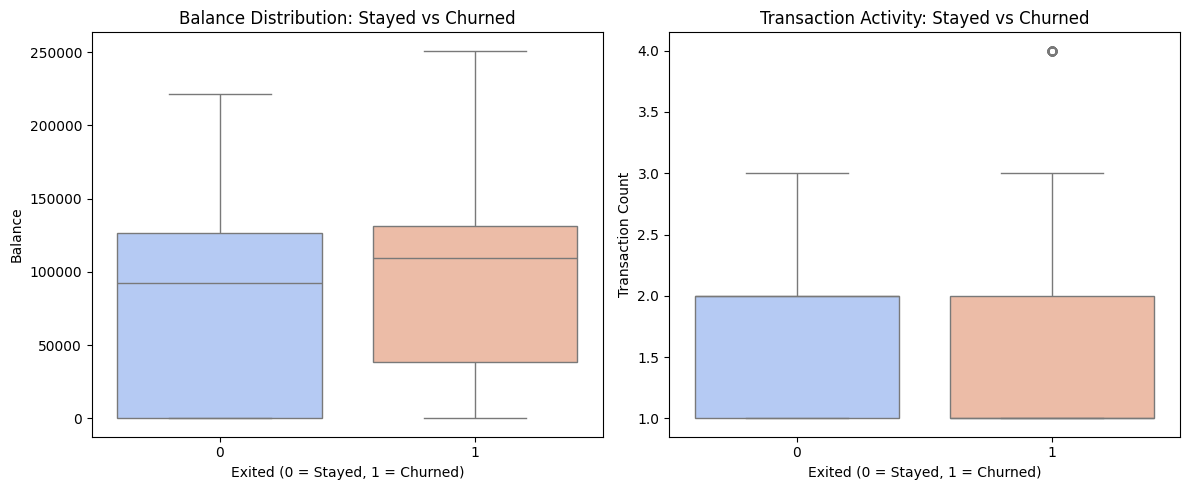

In [ ]:
transaction_col = 'NumOfProducts'
grouped_stats = df.groupby('Exited')[['Balance', transaction_col]].agg(['mean', 'median', 'min', 'max'])

grouped_stats = df.groupby('Exited')[['Balance', transaction_col]].agg(['mean', 'median', 'min', 'max'])
grouped_stats.columns = ['Balance_Mean', 'Balance_Median', 'Balance_Min', 'Balance_Max',
                         'Transaction_Mean', 'Transaction_Median', 'Transaction_Min', 'Transaction_Max']
print("Balance & Transaction Differences Between Stayed vs Churned Customers:\n", grouped_stats)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Exited'], y=df['Balance'], palette='coolwarm')
plt.title("Balance Distribution: Stayed vs Churned")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Balance")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Exited'], y=df[transaction_col], palette='coolwarm')
plt.title("Transaction Activity: Stayed vs Churned")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Transaction Count")

plt.tight_layout()
plt.show()


In [ ]:
low_credit_threshold = 600  # Low credit score: < 600
high_balance_threshold = df['Balance'].median()
low_credit_customers = df['CreditScore'] < low_credit_threshold
high_balance_customers = df['Balance'] > high_balance_threshold
both_conditions = low_credit_customers & high_balance_customers
probability = both_conditions.sum() / len(df)
print(f"Probability that a customer has both a low credit score and a high balance: {probability:.4f}")

Probability that a customer has both a low credit score and a high balance: 0.1499
